# Ford GoBike Tripdata Exploration
## by Bex

## Preliminary Wrangling

The dataset contains nearly 520k records of individual rides in a bike-sharing system of Ford in San Francisco Bay area for the year 2017. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import datetime as dt

%matplotlib inline

In [2]:
sb.set_style('darkgrid');

In [3]:
# Read in the dataset
df = pd.read_csv('data/fordgobike-tripdata-2017.csv')

In [4]:
df.shape

(519700, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [7]:
df.duplicated().sum()

0

### What is the structure of the dataset?

> There are 519700 rows containing individaul ride information divided into 13 columns. This represents information about ride duration, start time and end time of the trip, start and end stations of the ride as well as whether the user was a member or a customer.

### What is/are the main feature(s) of interest in the dataset?

> I am mostly interested in finding out what was the most popular times for the rides in terms of day, day of the week or the month, distribution of travel time durations and whether being member or not influence the duration of the ride.

> I expect that duration, start and end times of the ride and user_type columns will help the most in finding different trends and insights about the dataset

## Univariate Exploration

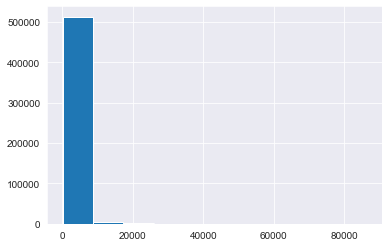

In [8]:
# Plot the distribution of travel times
plt.hist(data=df, x='duration_sec');

It seems that most of the rides fall into 0 and 10000 duration times. We should make a log transformation to see the trends

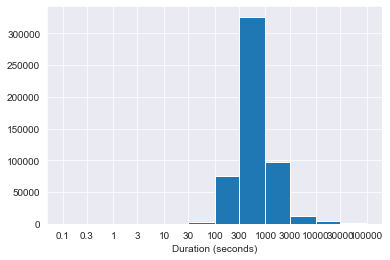

In [9]:
bins = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
plt.hist(data=df, x='duration_sec', bins=bins)
plt.xscale('log')
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
tick_labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, tick_labels)
plt.xlabel('Duration (seconds)');

Now it can be seen that majority of the rides lasted between 300 and 1000 seconds, followed by other group of rides between 1000 and 3000.

Next let's explore which month of the year had seen the biggest number of rides. In order to do this, I am going to convert start and end times of the dataset to datetime and extract the month variable from those dates.

In [10]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

Although I converted both of the time columns to datetime, we only need the month from start time. So, I will create a new column to store the month the ride started

In [11]:
# Get the month of the start date
df['month'] = pd.DatetimeIndex(df['start_time']).month
# Convert the month from integer to its name
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [12]:
# To maintain the order of the months, we should explicitly correct this
months = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_order = pd.api.types.CategoricalDtype(ordered=True, categories=months)
df['month'] = df['month'].astype(month_order)

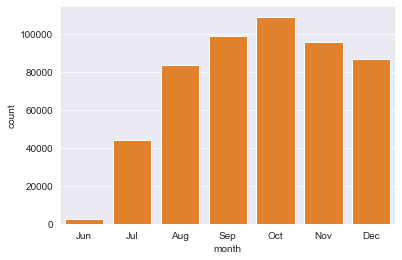

In [13]:
base_color = sb.color_palette()[1]
sb.countplot(data=df, x='month', color=base_color);

It appears that the most popular season for biking is autumn. Although we do not have data for all the months, it is important to note. Next variable I am going to look at is days of the week. Once again, I am creating a new column to store the weekday names.

In [14]:
# I am going to extract weekday names using the datetime module
df['weekday'] = df['start_time'].apply(lambda x: dt.datetime.strftime(x, "%A"))

In [15]:
# As before, set the ordering of the weekdays
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_order = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['weekday'] = df['weekday'].astype(week_order)

Now, let's look at the distribution

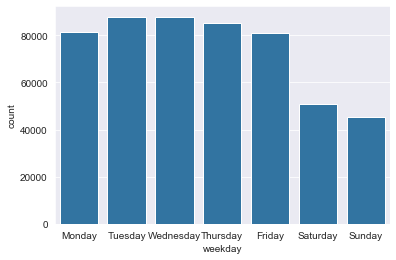

In [16]:
color = sb.color_palette()[0]
sb.countplot(data=df, x='weekday', color=color);

As you might imagine, this insight is pretty interesting. I assumed that weekends would be much more popular to go biking than weekdays but the countplot above proved otherwise.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> As the travel times were given in seconds, I had to transform the x axis using a log transform. From that, I found out that majority of travel times lasted bertween 5-15 minutes. Moreover, to look at the distributions of months and weekdays, I had to set their ordering beforehand. I found surprising patters in both months and weekday distributions. Of the months, september, october and november were the most popular times of your to go biking. Similarly, when I assumed that the weekends would have large numbers for number of rentals, weekdays turned out to have much higher rental counts than weekends.

## Bivariate Exploration

In this section I will be focusing on duration time vs. other features of rides like time of the year, time of the week, types of users and others.

First of all, I am going to see if different types of sucscriptions affect the duration.

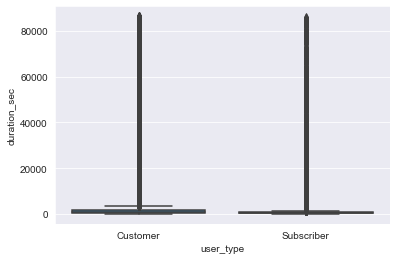

In [17]:
sb.boxplot(data=df, x='user_type', y='duration_sec');

The above poxplot reveals that there are huge outliers for both customer types. That's why I think, it is a good idea to look at durations below between 5-50 minutes because we now that majority of rides fall into that category. 

In [18]:
less_durations = df[(df.duration_sec > 300) & (df.duration_sec < 3000)]

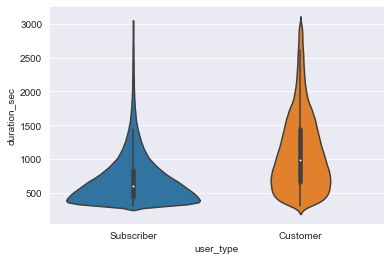

In [19]:
sb.violinplot(data=less_durations, x='user_type', y='duration_sec');

The violin plot above shows that generally, the median duration was higher for customers. Also, the duration times for customers were more spread out and normally distributed while a very large group of subscribers' ride lengths were centered around 7-8 minutes.

Second, I think that the relationship between user type and different times of year will be interesting. For this I will be using clustered bar charts.

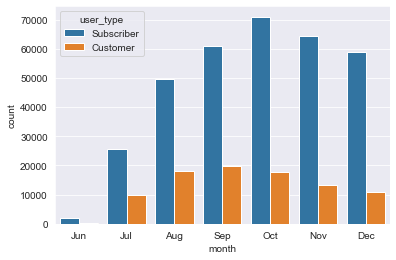

In [20]:
sb.countplot(data=less_durations, x='month', hue='user_type');

As you can see, although customers generally had longer durations, the number of subsribers heavily outweighs the number of customers in each month. This trend is even more pronounced in autumn season. Well, that would make sense because we already knew that regradless of user type, autumn was the best time for biking in 2017.

Let's also look at the weekday, too. I am going to use the same appoach as before.

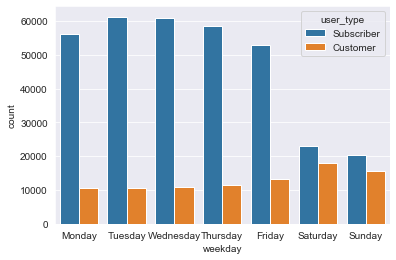

In [21]:
sb.countplot(data=less_durations, x='weekday', hue='user_type');

The trend we see in the above barchart confirms our findings in the first section. There were much more rides in weekdays than weekends and once again, the subscribers accounted for the majority.

One last thing I am going to look at is the correlation between duration and days of the week, because I think that rides happened in weekends would be longer than those in weekdays.

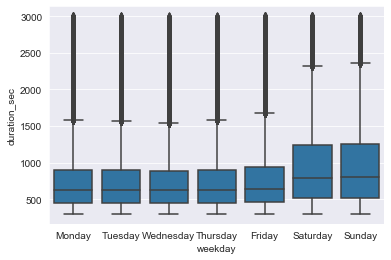

In [22]:
sb.boxplot(data=less_durations, x='weekday', y='duration_sec', color=color);

The boxplot above confirms my assumptions. Rides DO last longer during weekdays. Also, there are fewer outliers in weekends making the duration spread more normal which supports my claim even further.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In this section of my analysis, I generally focused more on the relationship of user types versus other factors like time of the year and day of the week. I also briefly epxlored duration times versus user type and the above variables. My findings suggest that there were much more subscribers than customers in the year of 2017. However, the duration times for customers were more normally spread out and the median duration was bigger than that of subscribes. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One very surprising trend which kind of contradicts the findings in the first part is that despite the fact that there were so much more rentals during weekdays, the duration times of the rentals in weekends were much higher for both user types. I will explore the above trends further in the next section

## Multivariate Exploration

> In this section I will try to analyze the relationships between times of year, user types, etc. at the same time.

Initially, let's look at duration times for both user types across different months.

C:\Users\advpro\Anaconda3\envs\da_nanodegree\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


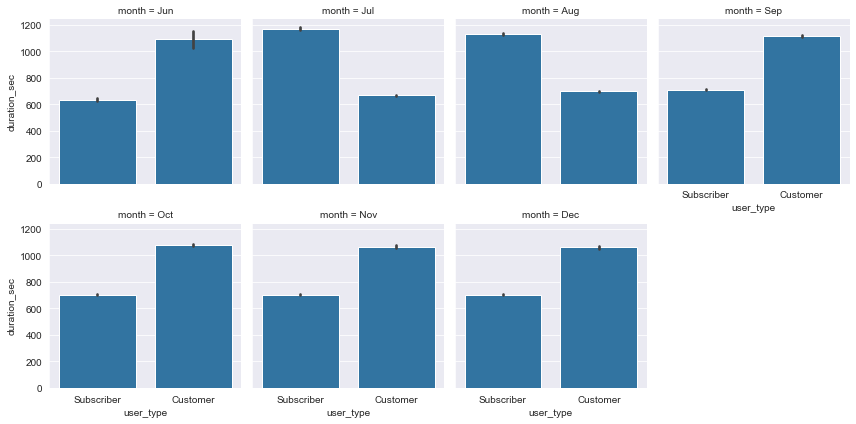

In [28]:
g = sb.FacetGrid(data=less_durations, col='month', col_wrap=4)
g.map(sb.barplot, 'user_type', 'duration_sec');

The FacetGrid supports some of our findings in sections 1 and 2 even further:
- Travel durations were generally longer for simple customers than actual members except for months of July and August

Now it is time to look at the weekdays against user type and duration

C:\Users\advpro\Anaconda3\envs\da_nanodegree\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


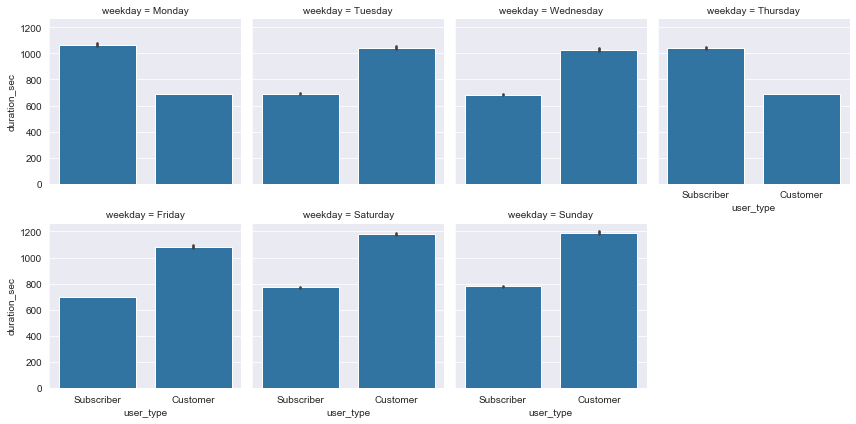

In [31]:
g = sb.FacetGrid(data=less_durations, col='weekday', col_wrap=4)
g.map(sb.barplot, 'user_type', 'duration_sec');

This facetgrid shows once again that the travel times were longer for customers except for Monday and Thursday.

One thing that is important to note is that the above FacetGrids actually hides the trend that the duration times were longer in weekends than weekdays.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> After exploring multiple variables at the same time, I was made sure that the duration times for customers were longer than subscribers throughout the year and throughout different weeks

### Were there any interesting or surprising interactions between features?

> However, one thing that facetgrids showed is that unlike the plots in section two, not all months and not all weekdays saw the dominance of customers in rentals and their durations. In fact, during July and August as well as in Mondays and Thursdays, rentals lasted more for actual members of Ford GoBike bike

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!